# ***Quantum Image Teleportation Protocol / Standard QITP***
* Extract the Pixels of the input image.
* Access each RGB value in each Pixel and pass through Quantum Circuit.
* After successful Teleportation, re-construct each RGB value.
* Re-construct the pixels.
* Save pixels in the form of Numpy array
* Display the Image.

In [ ]:
# importing required libraries
import time
import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

In [ ]:
img_name = input('Enter the Name of the file with extension : ')
# reading image file 
img = cv2.imread(img_name)

# # Convert BGR to RGB to print or get original image with original colors
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img.shape

Enter the Name of the file with extension : circle.png


(16, 16, 3)

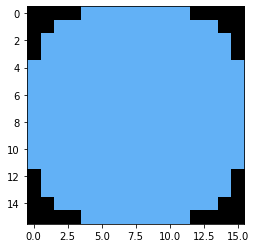

In [ ]:
# Plotting image
plt.imshow(img)

In [ ]:
# Printing the pixel values using ndimension array
arr = np.array(img)
print('Pixel values from Top To Bottom ---> ', len(arr))
print('Pixel values from Left To Right ---> ', len(arr[0]))

# Printing numpy array having pixels values.
print(len(arr))
print(len(arr[0]))
print(type(arr))
print(arr)

Pixel values from Top To Bottom --->  16
Pixel values from Left To Right --->  16
16
16
<class 'numpy.ndarray'>
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [  0   0   0]]

 [[  0   0   0]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  [ 98 177 246]
  

In [ ]:
# Initializing output numpy ndarray with same dimensions as the input array 
arr_out = np.zeros([len(arr), len(arr[0]), 3], dtype=int)

In [ ]:
def single_value(value, q):
  # decimal to binary
  l = ''
  a=[]
  nq = 8 # always nq value should be 8 as to maintain 8 binary bits for each value.
  n = value
  if(n>0):
      while(n>0):
          dig=n%2
          a.append(dig)
          n=n//2
      b = a
      if(len(a) != nq):
          for i in range(nq-len(a)):
              b.append(0)
      b.reverse()
      stra = ''
      for i in b:
          val = str(i)
          stra += val
      l += stra
  else:
      l += ('0'*nq)
#   print(l)
  li = []
  for i in range(0, 8, q):
    li.append(l[i:i+q])

  ''' aD --- represents --- Alice Data Qubit
    aQ --- represents --- Alice Qubit
    bQ --- represents --- Bob Data Qubit '''

  counts_list = ''
  t = 0
  for each in li:
      
      single_char = each 
      n = len(single_char)

      Alice_data = QuantumRegister(n, 'aD')
      Alice_qubit = QuantumRegister(n, 'aQ')
      Bob_qubit = QuantumRegister(n, 'bQ')
      cr = ClassicalRegister(n*3, 'c')
      circuit = QuantumCircuit(Alice_data, Alice_qubit, Bob_qubit, cr)

      i = 0
      for each in single_char:
          if(each == '1'):
              circuit.x(Alice_data[int(i)])
          i += 1
      circuit.barrier()


      for i in range(n):
          circuit.h(Alice_qubit[i])
          circuit.cx(Alice_qubit[i], Bob_qubit[i])
      circuit.barrier()


      for i in range(n):
          circuit.cx(Alice_data[n-1-i], Alice_qubit[n-1-i])
          circuit.h(Alice_data[n-1-i])
      circuit.barrier()

      for i in range(n):
          circuit.measure(Alice_qubit[i], cr[i])
      circuit.barrier()


      for i in range(n):
          circuit.cx(Alice_qubit[i], Bob_qubit[i])
          circuit.cz(Alice_data[i], Bob_qubit[i])
      circuit.barrier()


      for i in range(n):
          circuit.measure(Bob_qubit[i], cr[i])

      # circuit.draw(output = 'mpl')
      
      ''' Getting counts from backend '''
      simulator_backend = Aer.get_backend('qasm_simulator')
      result = execute(circuit, simulator_backend, shots = 1).result()
      counts = result.get_counts()
      
      
      for key in counts:
          key_var = key
          a = key_var[len(key_var)-n:]
          b = ''
          for i in range(len(a)):
              b = b + a[(-i-1)]
          counts_list += b

      t += 1

  dec_number= int(counts_list, 2)
  return(dec_number, t)

In [ ]:
t = 0
iter = 0
start = time.time()

for i in range(len(arr)):
    for j in range(len(arr[0])):
        for k in range(3):
          v1 = arr[i][j][k]
          v2, vt = single_value(v1, 4) # single_value(input rgb value, no.of qubits need to be used at each end.)
          iter += vt
          if(v1 == v2):
            arr_out[i][j][k] = arr[i][j][k]
          t += 1
          print(f'\rNumber of values |{t}| completed', end="")
print('\nTotal Number of Iterartions : ', iter)

# time.sleep(1)
end = time.time()
print(f"\nRuntime of the Program is |{end - start}| Seconds")

Number of values |768| completed
Total Number of Iterartions :  1536

Runtime of the Program is |48.60996198654175| Seconds


In [ ]:
arr_out

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 246],
        [ 98, 177, 24

In [ ]:
print(type(arr_out))
arr_out.shape

<class 'numpy.ndarray'>


(16, 16, 3)

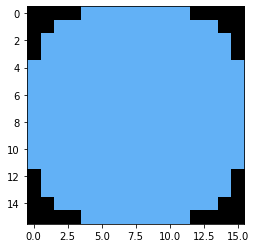

In [ ]:
# converting the teleported ndimension array into actual image.
from PIL import Image
import numpy as np

# Convert the pixels into an array using numpy
array = np.array(arr_out, dtype=np.uint8)

# Use PIL to create an image from the new array of pixels
new_image = Image.fromarray(array)
plt.imshow(new_image)
# new_image.save('Teleported_img.png')